# Analyzing Customers' income, spending and saving adequacy using predictive analyses and models

## Abstract

### Predictive analytics is a branch of data analytics that uses techniques like big data mining, statistics, modeling, machine learning and artificial intelligence to analyze data and make predictions. This project proposes statistical and  machine-learning models that can predict individuals' savings adequacy. Banks and Fintech companies are using advanced technology to build websites, digital advertising and other contents more efficiently and effectively. Considering the necessity to keep up with the competition, data science has become a tool to enhance the business in the Fintech industry. In the project, algorithms were developed to analyze the trends in the spending behaviours and preditive analysis and recommendations were given.













## About the Dataset

### This dataset offers a unique insight into the spending habits of customers, with detailed information on customers' names, gender, monthly income and expenditure.




In [1]:
# Analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

#Algorithms
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

### Data Wrangling

In [36]:
df = pd.read_excel(r'C:\Users\user\Documents\data analysis\customers_data.xlsx')

In [44]:
df.head(10)

,Employee ID,First Name,Last Name,Monthly Income,Gender,Monthy Expenditure
0,E02002,Kai,Le,4141,Male,7265
1,E02003,Robert,Patel,8639,Male,8291
2,E02004,Cameron,Lo,8581,Male,4828
3,E02005,Harper,Castillo,6734,Female,4632
4,E02006,Harper,Dominguez,5243,Female,4677
5,E02007,Ezra,Vu,8328,Male,5326
6,E02008,Jade,Hu,7624,Female,4326
7,E02009,Miles,Chang,9381,Male,7912
8,E02010,Gianna,Holmes,6411,Female,5560
9,E02011,Jameson,Thomas,5222,Male,4869


#### Note that; the Monthly Income and Expenditure are in $

In [6]:
df.shape

(1000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee ID         1000 non-null   object
 1   First Name          1000 non-null   object
 2   Last Name           1000 non-null   object
 3   Monthly Income      1000 non-null   int64 
 4   Gender              1000 non-null   object
 5   Monthy Expenditure  1000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [63]:
df.duplicated().sum()  # check for duplication

0

In [64]:
df.isnull().sum()

Employee ID           0
First Name            0
Last Name             0
Monthly Income        0
Gender                0
Monthy Expenditure    0
dtype: int64

### Perform EDA (Exploratory Data Analysis)

In [66]:
df.describe()

,Monthly Income,Monthy Expenditure
count,1000.000000,1000.000000
mean,6840.382000,6284.830000
std,1621.293544,1218.885025
min,4103.000000,4103.000000
25%,5435.000000,5251.000000
50%,6823.500000,6282.500000
75%,8303.500000,7343.000000
max,9498.000000,8399.000000


In [68]:
df.describe(include=['O'])

,Employee ID,First Name,Last Name,Gender
count,1000,1000,1000,1000
unique,1000,212,259,2
top,E02002,Christopher,Cruz,Female
freq,1,14,13,515


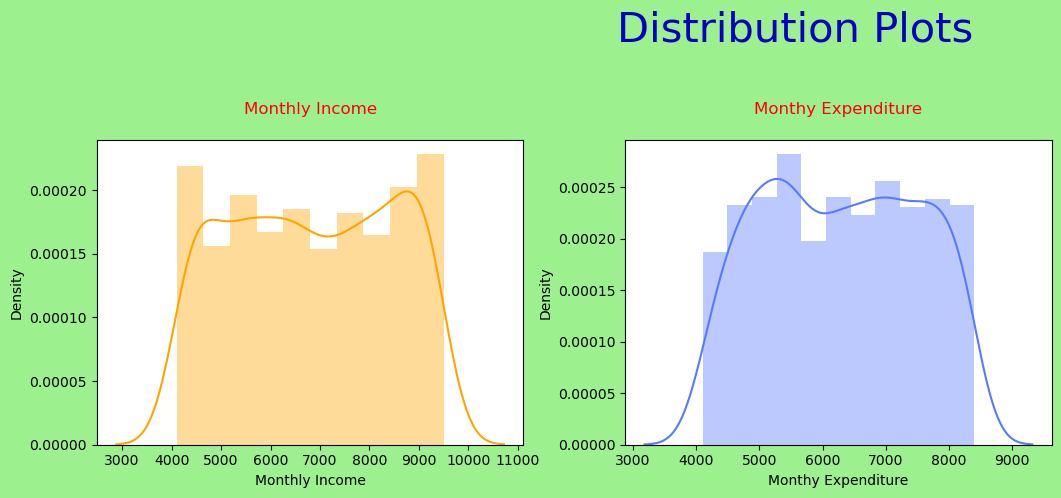

In [8]:
# Monthly Income and Monthly Expenditure
plt.figure(figsize=(16,12), facecolor= '#9DF08E')

#monthly income

plt.subplot(3,3,1)
plt.title('Monthly Income\n', color='#FF000B')
sns.distplot(df['Monthly Income'], color='orange')


#monthly expenditure

plt.subplot(3,3,2)
plt.title('Monthy Expenditure\n', color='#FF000B')
sns.distplot(df['Monthy Expenditure'], color='#577AFF')

plt.suptitle ('Distribution Plots\n', color='#0000C1', size=30)
plt.tight_layout()


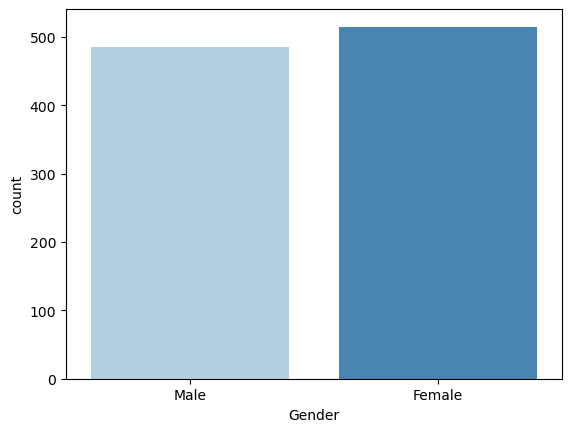

In [11]:
# Male vs Female
sns.countplot(x='Gender', data=df, palette='Blues' );

#### A total number of 485 males and 515 Females

## Modeling

In [16]:
# c0nverting columns that have object data to numeric

lis=['Employee ID', 'First Name', 'Last Name', 'Gender']
le=LabelEncoder()
for column in lis:
    df[column]=le.fit_transform(df[column])
    
df.head()

,Employee ID,First Name,Last Name,Monthly Income,Gender,Monthy Expenditure
0,0,121,124,4141,1,7265
1,1,179,171,8639,1,8291
2,2,33,133,8581,1,4828
3,3,88,26,6734,0,4632
4,4,88,58,5243,0,4677


### note that; male is 1 and Female is 0

In [19]:
x = df.drop(columns=['Employee ID'])
Y = df['Employee ID']
x.shape, Y.shape

((1000, 5), (1000,))

In [21]:
x=StandardScaler().fit_transform(x)
x[:3]

array([[ 0.26237443, -0.03133116, -1.66578885,  1.03046381,  0.80455534],
       [ 1.24460621,  0.60067072,  1.10992731,  1.03046381,  1.64672943],
       [-1.22790827,  0.08969048,  1.07413551,  1.03046381, -1.19581333]])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.30, random_state=44, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [42]:
NV=GaussianNB()
NV.fit(x_train, y_train)
NV.score(x_train,y_train),NV.score(x_test, y_test)

(1.0, 0.0)

## Recommendations

### 1. Customers do not have a good saving pattern. As they earn, they make expenses; some more than their monthly income. I would suggest nurturing a savings support network. Research by MaPS identified 11.1 million working-age adults on low-to-modest incomes who do not save regularly. This prompted the creation of the Nation of Savers initiative, which sets out to encourage more people into the habit of saving regularly by 2030.

### 2. Using digital tools- Digital banks should provide features that help users keep track of their income and expenses, and even help people to save - even if the amount being put aside is small. These tools include; 

###     ->spending trackers and budgeting tools: By providing regular spending reports, consumers can see their spending broken down into categories. Some companies even allow users to set a limit for each category, preventing them from going over budget on certain expenses.

###     ->Automated savings: With automated savings,consumers can set up for a certain amount to be stashed away every month automatically without having to do it by themselves.






## Conclusion

### In today's world, financial situations can be unpredictable, but there are always ways to secure yourself. It has already been mentioned that predictive analytics in the finance industry can give a new perspective on financial processes and situations. Financial Technology companies should ensure their customers are aware of the existence of these important digital tools. Even if they would not save money immediately, they'd be able to use the digital tools to keep track of their spending.